In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [3]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [4]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  200


In [5]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Dataset Preprocessing using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
WIDTH=224
HEIGHT=224

In [8]:
image_generator = ImageDataGenerator(rescale=1/255,
                                    #horizontal_flip=True,
                                    #shear_range=0.2 ,
                                    #zoom_range=0.2,
                                    #rotation_range=45,
                                    #height_shift_range=0.5,
                                    #fill_mode='nearest',
                                    validation_split=0.2)   

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 760 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

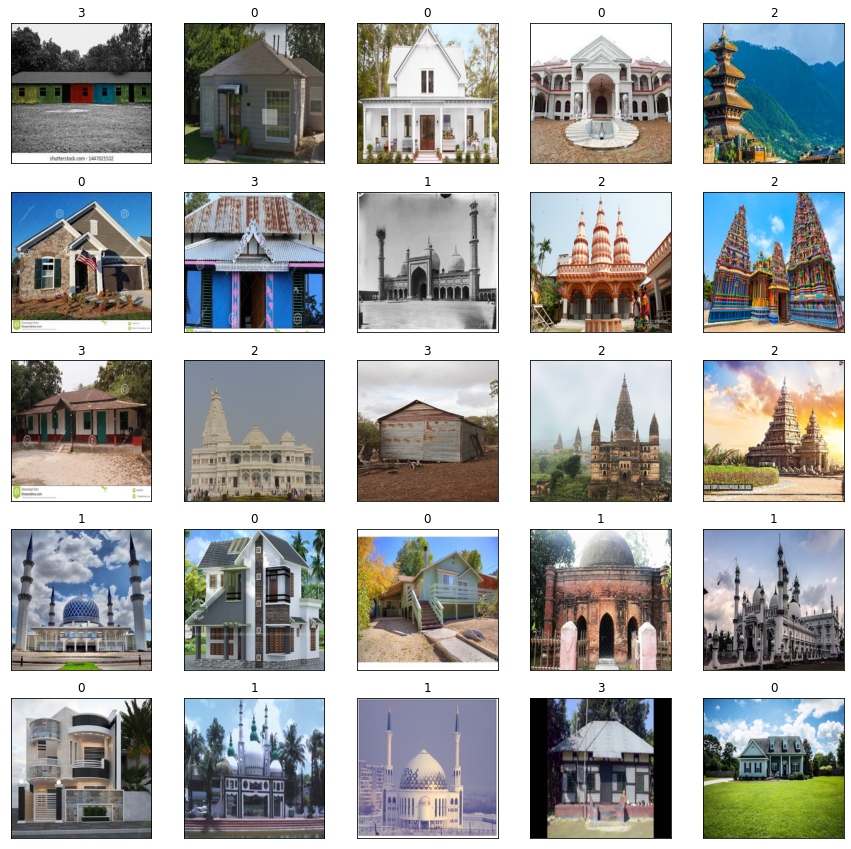

In [9]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Mobile Net v2

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
import tensorflow as tf

In [11]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False)

In [12]:
base_model.trainable = False

In [13]:
total_class

4

In [14]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


## Compile the model

In [15]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [16]:
epochs=10
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

760
190
23
5


In [17]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
23/23 [==============================] - 33s 1s/step - loss: 0.9090 - accuracy: 0.6630 - val_loss: 0.5019 - val_accuracy: 0.8500
Epoch 2/10
23/23 [==============================] - 43s 2s/step - loss: 0.3828 - accuracy: 0.8750 - val_loss: 0.3151 - val_accuracy: 0.8625
Epoch 3/10
23/23 [==============================] - 26s 1s/step - loss: 0.2547 - accuracy: 0.9148 - val_loss: 0.2972 - val_accuracy: 0.8687
Epoch 4/10
23/23 [==============================] - 25s 1s/step - loss: 0.2080 - accuracy: 0.9341 - val_loss: 0.2690 - val_accuracy: 0.8750
Epoch 5/10
23/23 [==============================] - 26s 1s/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.2300 - val_accuracy: 0.8875
Epoch 6/10
23/23 [==============================] - 24s 1s/step - loss: 0.1576 - accuracy: 0.9492 - val_loss: 0.2752 - val_accuracy: 0.8875
Epoch 7/10
23/23 [==============================] - 24s 1s/step - loss: 0.1372 - accuracy: 0.9606 - val_loss: 0.2148 - val_accuracy: 0.9062
Epoch 8/10
23/23 [==

## Plot Accuracy and Loss Graph

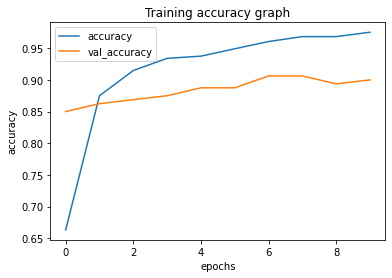

In [18]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

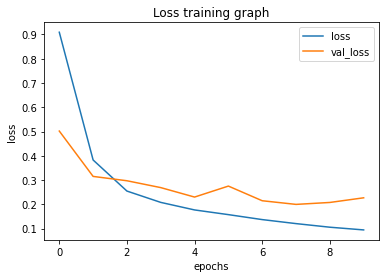

In [19]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [20]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

6/6 [==============================] - 4s 685ms/step - loss: 0.2205 - accuracy: 0.9000
Test Loss:  0.22050246596336365
Test Accuracy:  0.8999999761581421


In [21]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  89.99999761581421


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

In [22]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[2.4104118e-04 9.0631843e-04 9.1868380e-05 1.9209981e-03]]
3


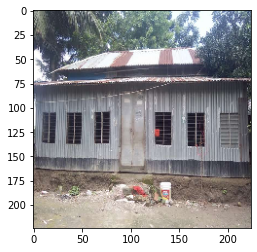

In [23]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0.00033233 0.00322258 0.00037131 0.00888526]]
3


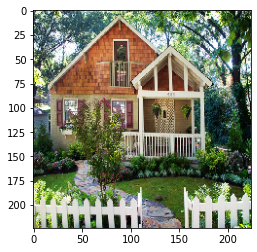

In [24]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0.00035578 0.00113204 0.00028369 0.00236064]]
3


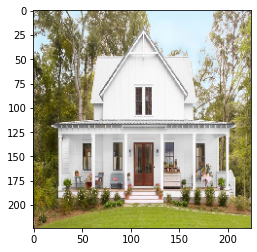

In [25]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.4610928e-05 6.5517426e-04 7.5586169e-05 1.6769171e-03]]
3


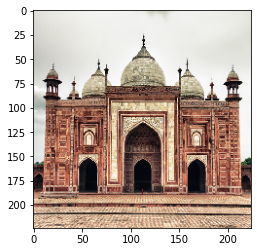

In [26]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

## Save Model

In [27]:
import time
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

./1615614911.h5
